In [220]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re, pip, conda

In [221]:
for package in [sklearn,mlp,np,pd,sns,pip,conda]:
    print(re.findall("([^']*)",str(package))[2],package.__version__)

sklearn 1.0.2
matplotlib 3.5.3
numpy 1.21.5
pandas 1.3.5
seaborn 0.12.0
pip 23.1.2
conda 4.3.16


> **导入数据**

In [57]:
import numpy as np
import pandas as pd
import time 

start_time = time.time()

# 读取数据集
application_train = pd.read_csv('./original data/application_train.csv')
application_test = pd.read_csv('./original data/application_test.csv')

#previous_application = pd.read_csv('./original data/previous_application.csv')

#bureau_df = pd.read_csv('./original data/bureau.csv')
#bureau_balance = pd.read_csv('./original data/bureau_balance.csv')

#POS_CASH_balance = pd.read_csv('./original data/POS_CASH_balance.csv')
#credit_card_balance = pd.read_csv('./original data/credit_card_balance.csv')
#installments_payments = pd.read_csv('./original data/installments_payments.csv')

end_time = time.time()

print("读取几个文件耗时: ", end_time - start_time, "s") # 我的电脑CPU为十代i7

读取几个文件耗时:  2.0653035640716553 s


In [4]:
application_train.shape

(307511, 122)

In [6]:
application_test.shape

(48744, 121)

In [8]:
print(f'previous_application.shape: {previous_application.shape}')
print(f'bureau_df.shape:            {bureau_df.shape}')
print(f'bureau_balance.shape:       {bureau_balance.shape}')
print(f'POS_CASH_balance.shape:     {POS_CASH_balance.shape}')
print(f'credit_card_balance.shape:  {credit_card_balance.shape}')
print(f'installments_payments.shape:{installments_payments.shape}')

previous_application.shape: (1670214, 37)
bureau_df.shape:            (1716428, 17)
bureau_balance.shape:       (27299925, 3)
POS_CASH_balance.shape:     (10001358, 8)
credit_card_balance.shape:  (3840312, 23)
installments_payments.shape:(13605401, 8)


In [230]:
print(f'application_train.shape: {application_train.shape}')
print(f'previous_application.shape: {previous_application.shape}')
print(f'bureau_df.shape:            {bureau_df.shape}')
print(f'bureau_balance.shape:       {bureau_balance.shape}')
print(f'POS_CASH_balance.shape:     {POS_CASH_balance.shape}')
print(f'credit_card_balance.shape:  {credit_card_balance.shape}')
print(f'installments_payments.shape:{installments_payments.shape}')

application_train.shape: (307511, 122)
previous_application.shape: (1670214, 37)
bureau_df.shape:            (1716428, 17)
bureau_balance.shape:       (27299925, 3)
POS_CASH_balance.shape:     (10001358, 8)
credit_card_balance.shape:  (3840312, 23)
installments_payments.shape:(13605401, 8)


- **样本极度不平衡**

In [231]:
application_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot:ylabel='Frequency'>

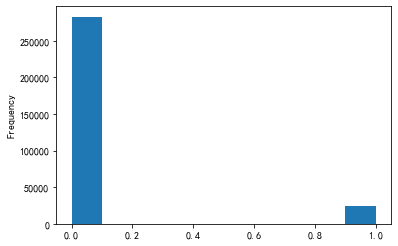

In [232]:
application_train['TARGET'].astype(int).plot.hist()

> 可以看到样本极度的不平衡（1类样本占比小于10%）

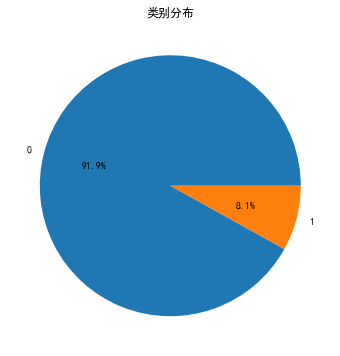

In [233]:
class_counts = application_train['TARGET'].value_counts()

# 创建一个饼图
plt.figure(figsize=(10, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('类别分布')
plt.rcParams['font.sans-serif']=['SimHei']#用来正常显示中文
plt.show()

In [59]:
application_train['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

**静态信息**：

- 客户的个人基本信息：这些特征描述了客户的性别、年龄、教育程度、婚姻状态、职业类型、组织类型等个人情况。

- 客户的财务状况：这些特征反映了客户的财务状况，如收入总额、是否有车辆和房产、车辆年龄、贷款金额、每期还款金额、商品价格等。

- 客户的家庭状况：这些特征展示了客户的家庭情况，如子女数量、家庭成员数量等。

- 客户的居住和工作信息：这些特征涉及了客户的居住地、工作地情况，以及是否有过城市或地区的变更。

- 客户的社交信息：这些特征体现了客户的社交状况，如社交圈内有多少人逾期还款或者违约等。

- 客户的联系方式信息：这些特征记录了客户的联系方式，如是否有手机号码、工作电话、家庭电话、邮箱等。

- 客户的贷款申请信息：这些特征表明了客户的贷款申请情况，如申请的贷款类型、申请时是否有陪同人、申请的时间（周几、几点）等

- 外部文件信息：EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3、FLAG_DOCUMENT_x(2-21)

**特征字段的命名规则**：

- SK_ID_XXXXXX格式的字段是每个表的唯一ID。比如SK_ID_CURR是主表的ID，SK_ID_BUREAU是BUREAU表的ID。

- FLAG_XXXXXX格式的字段是一种标识符，取值为Y/N或者0/1，表示是否满足某种条件。比如FLAG_MOBIL表示是否有手机号码，FLAG_OWN_CAR表示是否有汽车。

- CNT_XXXXXX格式的字段是一种计数，表示某种数量。比如CNT_CHILDREN表示子女数量，XXXXXX_CNT_SOCIAL_CIRCLE表示社交圈内的违约人数。

- AMT_XXXXXX格式的字段是一种金额或者价格，表示某种数额。比如AMT_INCOME_TOTAL表示收入总额，AMT_CREDIT表示贷款金额，AMT_GOODS_PRICE表示商品价格。

- DAYS_XXXXXX格式的字段都和天数有关，表示某种日期距离申请日期的天数。比如DAYS_BIRTH表示出生日期距离申请日期的天数，DAYS_EMPLOYED表示就业日期距离申请日期的天数。

- XXXXXX_AVG,XXXXXX_MODE,XXXXXX_MEDI格式的字段都是描述客户居住地的一些统计量，如平均值（AVG/average）、众数（MODE）、中位数（MEDI/median）等。比如HOUSETYPE_MODE表示房屋类型众数，EMERGENCYSTATE_MODE表示紧急状态众数。

- REG_REGION_XXXXXXX/REGION_XXXXXXX格式的字段都是和客户居住地有关的信息，如评级、人口密度、与工作地是否一致等。

- 其他一些没有重点使用或者含义明显的字段，如NAME_CONTRACT_TYPE表示贷款合同类型，CODE_GENDER表示性别，NAME_EDUCATION_TYPE表示教育程度等。

### 1.2 主表数据探索与描述性统计

In [62]:
import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns

from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score
from scipy.misc import derivative
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from lightgbm import LGBMClassifier
import warnings
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler

warnings.filterwarnings('ignore')

- 读取数据集

In [236]:
# 读取数据集
application_train = pd.read_csv('./application_train.csv')
application_test = pd.read_csv('./application_test.csv')

In [237]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,...,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,...,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [238]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,...,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.525734,0.509677,0.612704,0.3052,0.1974,0.9970,0.9592,0.1165,0.32,0.2759,0.375,0.0417,0.2042,...,0.3827,0.0389,0.0847,0.3081,0.1974,0.9970,0.9597,0.1173,0.32,0.2759,0.375,0.0417,0.2078,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,

- 查看数据集有多少数值型字段以及离散型、类别型字段

In [239]:
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

可以看到有16列离散型字段，而且这16列都是字符串或者文本数据

In [240]:
application_train.select_dtypes('object')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick",No
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,reg oper account,block of flats,"Stone, brick",No
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel,No
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,NaN,block of flats,"Stone, brick",No


- **缺失值**

In [64]:
def missing (df):
    """
    计算每一列的缺失值及占比
    """
    missing_number = df.isnull().sum().sort_values(ascending=False)              # 每一列的缺失值求和后降序排序                  
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)          # 每一列缺失值占比
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])      # 合并为一个DataFrame
    return missing_values

In [242]:
missing(application_train).sort_values(by='Missing_Percent',ascending=False)

,Missing_Number,Missing_Percent
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_MODE,214865,0.698723
COMMONAREA_AVG,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
...,...,...
FLAG_DOCUMENT_17,0,0.000000
FLAG_DOCUMENT_18,0,0.000000
FLAG_DOCUMENT_19,0,0.000000
FLAG_DOCUMENT_20,0,0.000000


In [66]:
print(f"主表122列特征中有{(missing(application_train)['Missing_Number']>0).sum()}列有缺失值")

主表122列特征中有67列有缺失值


In [68]:
missing(application_train)[missing(application_train)['Missing_Number']>0].index

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATI

- 根据业务理解进行填充

> NAME_TYPE_SUITE字段的缺失值

In [245]:
application_train['NAME_TYPE_SUITE'].isna().sum()

1292

In [246]:
application_train['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

正常情况下，类别型变量的缺失值应该由众数填充。但是我们发现NAME_TYPE_SUITE的众数为Unaccompanied，而这个群体的违约率为0.08。相比之下，缺失值群体的平均违约率为0.05。因此，我们认为缺失值很有可能代表某种特殊群体，我们将其填充为Uknow。

In [70]:
application_train[application_train['NAME_TYPE_SUITE']=='Unaccompanied']['TARGET'].mean()

0.08183047246565751

In [248]:
application_train[application_train['NAME_TYPE_SUITE'].isna()]['TARGET'].mean()

0.05417956656346749

In [72]:
application_train['NAME_TYPE_SUITE'] = application_train['NAME_TYPE_SUITE'].fillna('Unknow')
application_test['NAME_TYPE_SUITE'] = application_test['NAME_TYPE_SUITE'].fillna('Unknow')

> OCCUPATION_TYPE字段的缺失值

OCCUPATION_TYPE的缺失值字段也和前面的字段出现了类似的情况

In [250]:
application_train['OCCUPATION_TYPE'].value_counts()

Laborers                55186
Sales staff             32102
Core staff              27570
Managers                21371
Drivers                 18603
                        ...  
Waiters/barmen staff     1348
Secretaries              1305
Realty agents             751
HR staff                  563
IT staff                  526
Name: OCCUPATION_TYPE, Length: 18, dtype: int64

In [251]:
application_train['OCCUPATION_TYPE'].isna().sum()

96391

In [252]:
application_train[application_train['OCCUPATION_TYPE'].isna()]['TARGET'].mean()

0.06513056198192778

In [253]:
application_train[application_train['OCCUPATION_TYPE']=='Laborers']['TARGET'].mean()

0.10578769977892943

In [74]:
application_train['OCCUPATION_TYPE'] = application_train['OCCUPATION_TYPE'].fillna('Unknow')
application_test['OCCUPATION_TYPE'] = application_test['OCCUPATION_TYPE'].fillna('Unknow')

> OWN_CAR_AGE字段的缺失值

In [255]:
application_train['OWN_CAR_AGE'].isnull().sum()

202929

仔细思考，OWN_CAR_AGE为什么会有缺失值呢？如果一个人没有车的话，那OWN_CAR_AGE应该是多少？

In [256]:
application_train[['FLAG_OWN_CAR','OWN_CAR_AGE']]

,FLAG_OWN_CAR,OWN_CAR_AGE
0,N,NaN
1,N,NaN
2,Y,26.0
3,N,NaN
4,N,NaN
...,...,...
307506,N,NaN
307507,N,NaN
307508,N,NaN
307509,N,NaN


似乎车龄为缺失值的这些用户都是因为没有车

In [257]:
application_train.loc[application_train['OWN_CAR_AGE'].isnull() & (application_train['FLAG_OWN_CAR']=='N')][['FLAG_OWN_CAR','OWN_CAR_AGE']]

,FLAG_OWN_CAR,OWN_CAR_AGE
0,N,NaN
1,N,NaN
3,N,NaN
4,N,NaN
5,N,NaN
...,...,...
307506,N,NaN
307507,N,NaN
307508,N,NaN
307509,N,NaN


In [258]:
application_train.loc[application_train['OWN_CAR_AGE'].isnull() & (application_train['FLAG_OWN_CAR']=='Y')][['FLAG_OWN_CAR','OWN_CAR_AGE']]

,FLAG_OWN_CAR,OWN_CAR_AGE
30897,Y,NaN
181231,Y,NaN
217549,Y,NaN
229867,Y,NaN
236868,Y,NaN


In [76]:
# 填充没有车的人车龄为0
application_train.loc[application_train['FLAG_OWN_CAR'] == 'N', 'OWN_CAR_AGE'] = application_train.loc[application_train['FLAG_OWN_CAR'] == 'N', 'OWN_CAR_AGE'].fillna(0)
application_test.loc[application_test['FLAG_OWN_CAR'] == 'N', 'OWN_CAR_AGE'] = application_test.loc[application_test['FLAG_OWN_CAR'] == 'N', 'OWN_CAR_AGE'].fillna(0)

In [260]:
# 检查一下填充是否成功
application_train['OWN_CAR_AGE'].isna().sum()

5

In [261]:
application_test['OWN_CAR_AGE'].isna().sum()

1

我们先保留训练集和测试集中的缺失值，后续建模时可以考虑用中位数填充或者直接交给lightgbm处理

In [262]:
application_train['DAYS_LAST_PHONE_CHANGE'].isna().sum()

1

注意到，'DAYS_LAST_PHONE_CHANGE'这个特征中仅有一个缺失值，但是在训练集和测试集中，我们都观察到大量的客户此特征值为0。从业务逻辑的角度来看，0在这个场景中并没有具体的实际意义，因为它并不能代表客户上一次更换手机的确切天数。因此，我们可以把0视作缺失值，进行处理。至于如何填充这些缺失值，我们有多种策略可选。一种是用中位数进行填充，这是因为中位数在大多数情况下能较好地反映数据的集中趋势，且对极端值不敏感。另一种方法是将处理缺失值的任务直接交给LightGBM模型，因为LightGBM具有处理缺失值的能力。

In [263]:
application_train['DAYS_LAST_PHONE_CHANGE'].value_counts()

 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-4051.0        1
-3593.0        1
-3622.0        1
-3570.0        1
-3538.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

In [264]:
application_test['DAYS_LAST_PHONE_CHANGE'].value_counts()

 0.0       5801
-1.0        174
-2.0         71
-3.0         45
-1799.0      44
           ... 
-3861.0       1
-3927.0       1
-3014.0       1
-3687.0       1
-2671.0       1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3579, dtype: int64

In [78]:
application_train['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True)
application_test['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True)

- 删除

> CNT_FAM_MEMBERS字段的缺失值

In [266]:
application_train['CNT_FAM_MEMBERS'].isna().sum()

2

In [267]:
application_test['CNT_FAM_MEMBERS'].isna().sum()

0

In [82]:
application_train = application_train[application_train['CNT_FAM_MEMBERS'].notna()]

> CODE_GENDER字段的缺失值

有时候缺失值字段并不是用numpy里面的nan来表示的，比如CODE_GENDER字段，XNA就是缺失值的一种形式，因为这种缺失值很少见，而且测试集中也没有这种取值，所以我们可以直接删除它们

In [269]:
application_train['CODE_GENDER'].isna().sum()

0

In [270]:
application_train['CODE_GENDER'].value_counts()

F      202447
M      105058
XNA         4
Name: CODE_GENDER, dtype: int64

In [271]:
application_test['CODE_GENDER'].value_counts()

F    32678
M    16066
Name: CODE_GENDER, dtype: int64

In [84]:
application_train = application_train[application_train['CODE_GENDER'] != 'XNA']

### 1.3 Kernel Density Estimation与异常值检测

In [273]:
# 使用描述性统计来看一下主表中有没有异常值
pd.set_option("display.max_columns", 106)
# pd.set_option("display.max_row", 143)
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307505.000000,307505.000000,307505.00000,3.075050e+05,3.075050e+05,307493.000000,3.072290e+05,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000,307500.000000,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000,134130.000000,3.068450e+05,246541.000000,151446.000000,127564.000000,157500.000000,103020.000000,92644.000000,143616.000000,152679.000000,154487.000000,98866.000000,124919.000000,97309.000000,153157.000000,93994.000000,137826.000000,151446.000000,127564.000000,157500.000000,103020.000000,92644.000000,143616.000000,152679.000000,154487.000000,98866.00000,124919.000000,97309.000000,153157.000000,93994.000000,137826.000000,151446.000000,127564.000000,157500.000000,103020.000000,92644.000000,143616.000000,152679.000000,154487.000000,98866.000000,124919.000000,97309.000000,153157.000000,93994.000000,137826.000000,159076.000000,306484.000000,306484.000000,306484.000000,306484.000000,269832.000000,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000,307505.00000,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000,265987.000000,265987.000000,265987.000000,265987.000000,265987.000000,265987.000000
mean,278181.821811,0.080730,0.41705,1.687967e+05,5.990284e+05,27108.638224,5.383977e+05,0.020868,-16037.049495,63816.348794,-4986.147994,-2994.201437,4.101958,0.999997,0.819886,0.199356,0.998133,0.281056,0.056721,2.152658,2.052461,2.031518,12.063378,0.015144,0.050767,0.040656,0.078174,0.230455,0.179555,0.502128,5.143908e-01,0.510856,0.117442,0.088443,0.977735,0.752470,0.044622,0.078943,0.149726,0.226283,0.231895,0.066334,0.100776,0.107401,0.008809,0.028358,0.114233,0.087544,0.977065,0.759635,0.042554,0.074491,0.145194,0.222316,0.22806,0.064958,0.105646,0.105977,0.008077,0.027023,0.117852,0.087955,0.97775

In [274]:
(application_train['DAYS_EMPLOYED'] / 365).describe()

count    307505.000000
mean        174.839312
std         387.059825
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

- **核密度估计Kernel Density Estimation**

In [275]:
application_train.loc[application_train['TARGET'] == 0, 'DAYS_EMPLOYED']

1          -1188
2           -225
3          -3039
4          -3038
5          -1588
           ...  
307505    365243
307506      -236
307507    365243
307508     -7921
307510     -1262
Name: DAYS_EMPLOYED, Length: 282680, dtype: int64

<AxesSubplot:>

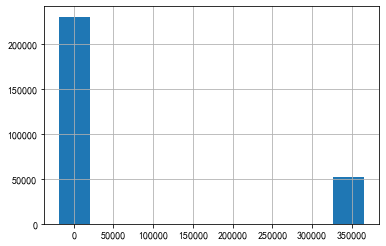

In [276]:
application_train.loc[application_train['TARGET'] == 0, 'DAYS_EMPLOYED'].hist()

接着，使用这些年数数据创建一个KDE图，标签为'target == 0'

<AxesSubplot:xlabel='DAYS_EMPLOYED', ylabel='Density'>

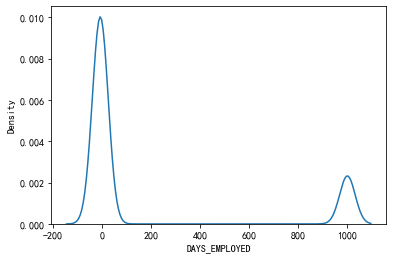

In [277]:
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'DAYS_EMPLOYED'] / 365, label = 'target == 0')

和前一行代码类似，只不过这次是选择的TARGET为1的记录

<AxesSubplot:xlabel='DAYS_EMPLOYED', ylabel='Density'>

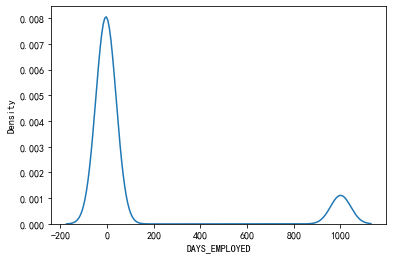

In [278]:
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'DAYS_EMPLOYED'] / 365, label = 'target == 1')

- **KDE用于异常检测与相关性分析**

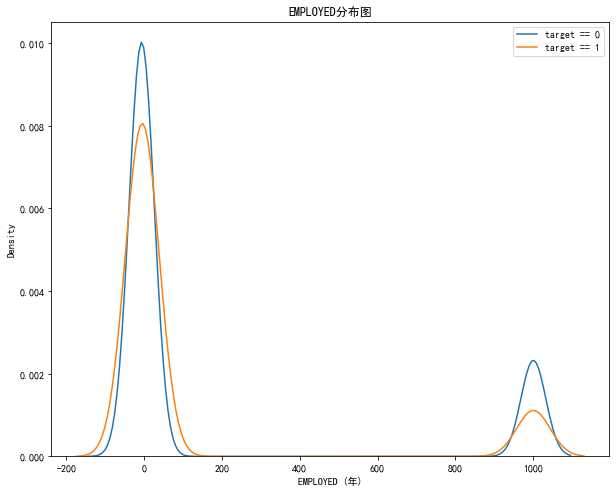

In [279]:
plt.figure(figsize = (10, 8))

sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'DAYS_EMPLOYED'] / 365, label = 'target == 0')

sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'DAYS_EMPLOYED'] / 365, label = 'target == 1')


plt.xlabel('EMPLOYED (年)') 
plt.ylabel('Density'); plt.title('EMPLOYED分布图')
plt.legend() # 显示曲线所代表的含义
plt.show()

In [280]:
def kde_plot(feature_name,df):
    plt.figure(figsize = (8, 6))

    # 使用违约用户的目标特征feature_name年数数据创建一个KDE图，并命名这条曲线的名字为'target == 0'
    sns.kdeplot(df.loc[df['TARGET'] == 0, feature_name] , label = 'target == 0')

    # 使用违约用户的目标特征feature_name年数数据创建一个KDE图，并命名这条曲线的名字为'target == 1'
    sns.kdeplot(df.loc[df['TARGET'] == 1, feature_name] , label = 'target == 1')

    # 设置横纵坐标
    plt.xlabel(feature_name) 
    plt.ylabel('Density'); plt.title('%s 分布图' %feature_name)
    plt.legend() # 显示曲线所代表的含义
    plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文
    plt.rcParams['axes.unicode_minus'] = False # 显示负号
    plt.show()

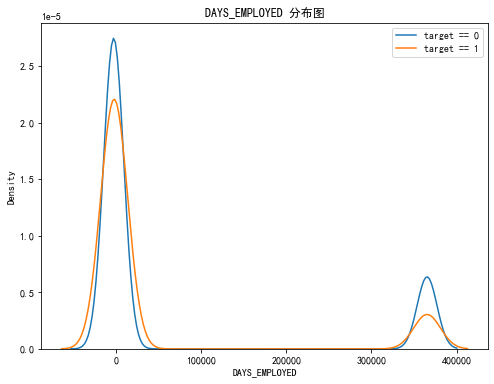

In [281]:
kde_plot('DAYS_EMPLOYED',application_train)

In [87]:
application_train['DAYS_EMPLOYED_ANOM'] = application_train["DAYS_EMPLOYED"] == 365243
application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

application_test['DAYS_EMPLOYED_ANOM'] = application_test["DAYS_EMPLOYED"] == 365243
application_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

In [283]:
application_train['DAYS_LAST_PHONE_CHANGE'].value_counts()

-1.0       2812
-2.0       2318
-3.0       1763
-4.0       1285
-5.0        824
           ... 
-3884.0       1
-3713.0       1
-3978.0       1
-3739.0       1
-3538.0       1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3772, dtype: int64

在我们已经完成了对缺失值和异常值的处理之后，我们来探究特征与目标变量之间的关系，这在数据探索阶段至关重要。这有助于我们理解哪些特征可能对预测目标产生重要影响，并为后续的特征工程提供思路和参考方向。

比较常见的有三种方法：

- 可视化：箱线图、小提琴图、直方图、核密度估计图

- 相关系数：相关系数是一种用于衡量两个变量之间线性关系强度和方向的统计度量。Pearson相关系数是最常用的一种相关系数。它的值在-1和1之间，-1表示完全的负线性关系，1表示完全的正线性关系，0表示没有线性关系。这个方法的一个局限性是它只能捕捉到线性关系，而对于非线性关系可能不太敏感。

- 特征重要性：使用模型直接建模，打印特征的重要性。

这几种方法我们都会讲到，因为特征工程的思路往往不是遵循固定的方法论，而是源于灵感和创意。这些灵感和创意需要你对特征的业务含义和重要性有深刻的理解才能产生。因此，在接下来的课件中，我们将利用上述三种方法，持续地挖掘有价值的特征，为学习特征工程打下坚实的基础。

- **可视化3大类相关性分析图像**

直方图是一种常用的数据可视化方法，我们在前面的课程已经介绍过了，这里就不再赘述了。下面我们重点回顾一下箱线图和小提琴图，因为它们和核密度图有着一定的联系。我们会讲解它们的含义和作用，以及和核密度图的关系。最后，我们会总结一下这三种图的异同，以及在不同场景下的适用性。

- 箱线图

箱线图是一种用来显示数据分布情况的图形，它可以展示出数据的最大值、最小值、中位数、上下四分位数、异常值等信息。

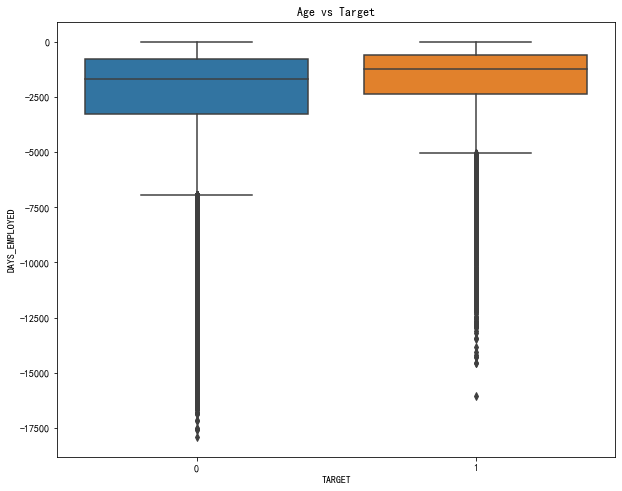

In [284]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'TARGET', y = 'DAYS_EMPLOYED', data = application_train)
plt.title('Age vs Target')
plt.show()

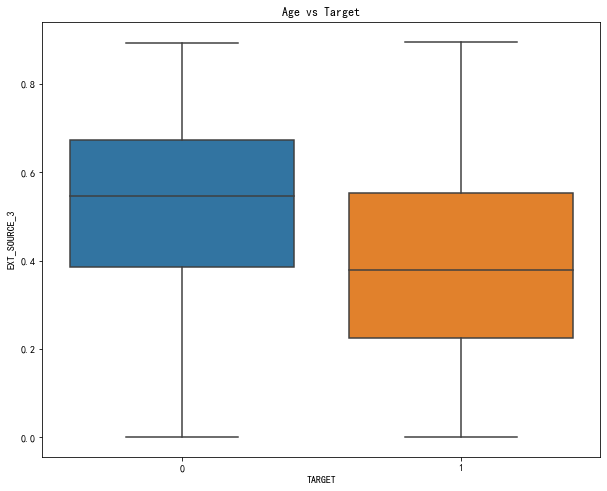

In [285]:
# 没有异常值的箱线图应该是这样的
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'TARGET', y = 'EXT_SOURCE_3', data = application_train)
plt.title('Age vs Target')
plt.show()

如果你想了解一个特征的整体分布以及是否存在异常值，那么箱线图是一个很好的选择。

- KDE图

上面我们通过直方图引入了核密度估计图，它可以看做是直方图的平滑版本。但从专业的学术定义上讲，核密度估计图是一种用来展示连续变量的概率密度的方法，它可以展示出数据的整体分布形态。

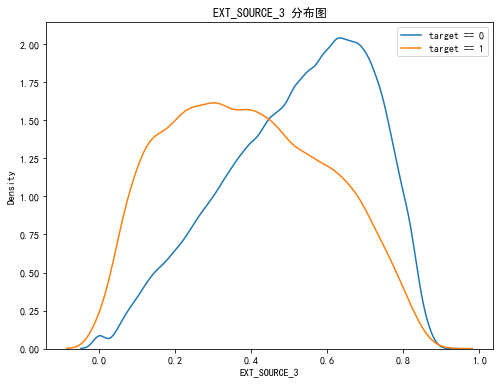

In [286]:
# 画出EXT_SOURCE_3字段在标签为0以及标签为1的数据分布形态，我们发现差异比较大
kde_plot('EXT_SOURCE_3',application_train)

如果你想对数据的分布形态有一个直观的认识，那么核密度估计图是一个很好的选择。

- 小提琴图

小提琴图是一种结合了箱线图和核密度估计图的图形，它不仅可以显示出数据的分位数信息，还可以显示出数据的密度分布情况。

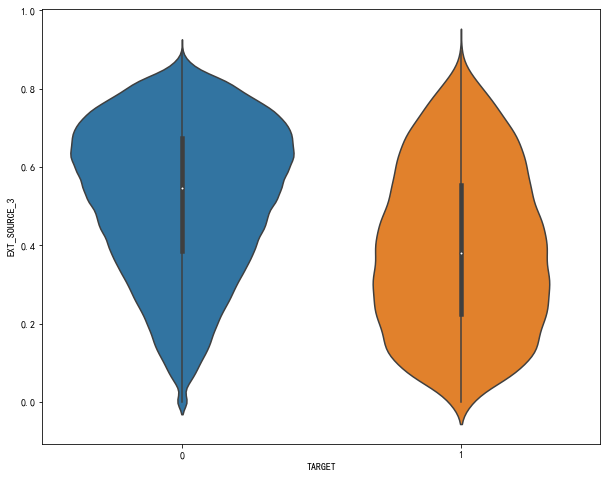

In [287]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='TARGET', y='EXT_SOURCE_3', data=application_train)
plt.show()

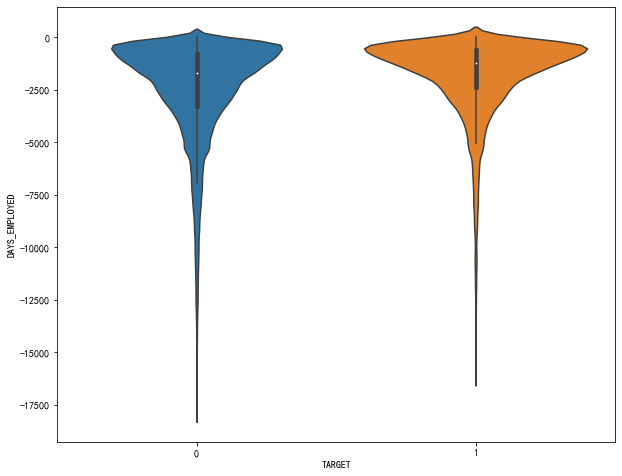

In [288]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='TARGET', y='DAYS_EMPLOYED', data=application_train)
plt.show()

>**总结**：箱线图适合用来比较不同类别或者分组的数据的分布差异，以及发现数据的异常值。核密度估计图适合用来探索单个变量或者两个变量之间的数据分布情况，以及发现数据的聚类或者模式等特点。小提琴图是上述二者的结合，可以同时展示数据的离群值和密度分布，但是这也可能导致图形不够直观，需要更多的注意力来解读。你应该根据自己的实际需求和数据特点来选择最合适的图形。比如在上述情况下，我们已经知道365243是一个异常值，我们只是想看一下如何处理这个异常值，因此要看一下标签为1和标签为0时该字段的数据分布是否有较大差异，从而做出判断。

学会了看KDE图之后，我们就可以用这种方法来看某个特征对标签是不是可能会有比较大的影响

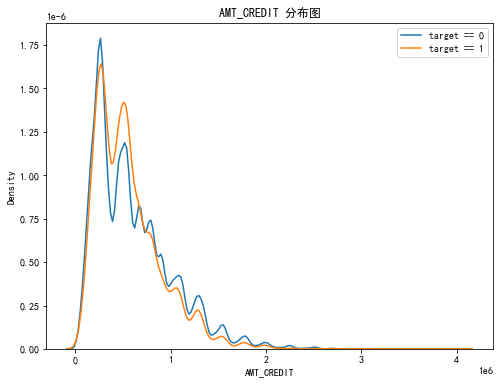

In [289]:
kde_plot('AMT_CREDIT',application_train)

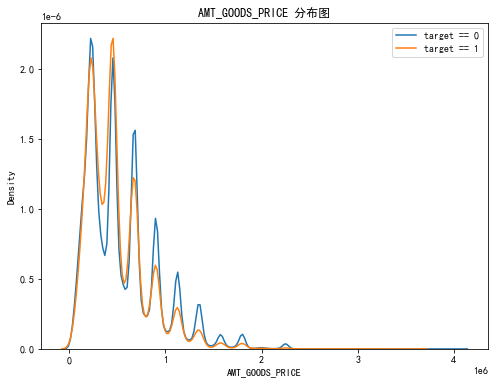

In [290]:
kde_plot('AMT_GOODS_PRICE',application_train)

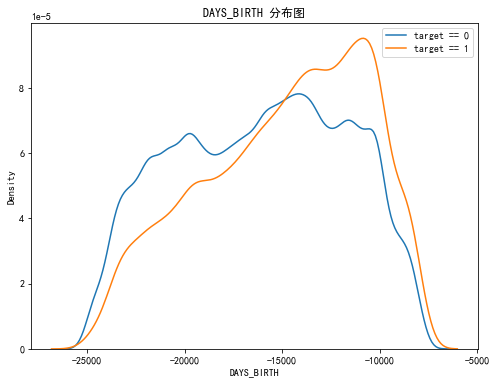

In [291]:
kde_plot('DAYS_BIRTH',application_train)

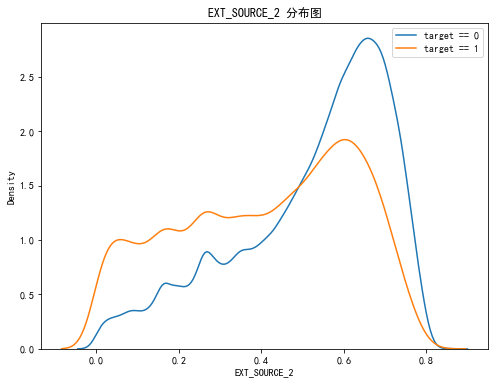

In [292]:
kde_plot('EXT_SOURCE_2',application_train)

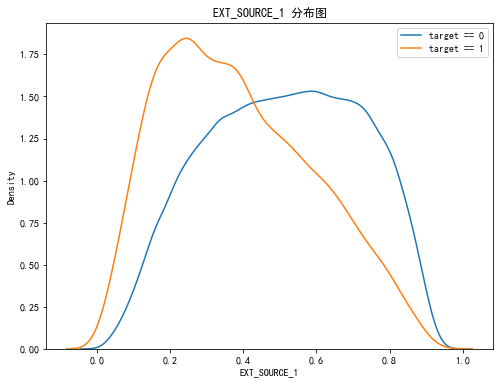

In [293]:
kde_plot('EXT_SOURCE_1',application_train)

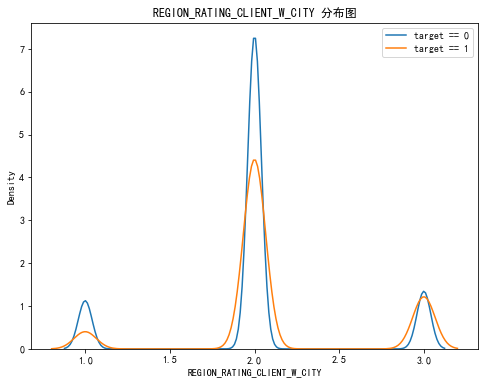

In [294]:
kde_plot('REGION_RATING_CLIENT_W_CITY',application_train)

**结论**：根据我们之前对主表的探索，三个外部文件（EXT_SOURCE_X）以及出生日期在不同标签下的取值分布有非常大的不同，后续在特征工程阶段可以考虑对这些特征进行重点的衍生。

- **相关系数分析**

皮尔逊相关系数的绝对值可以反映两个变量之间的线性相关程度

一般可以按照以下标准进行解释

         00-.19 “非常弱”
         0.20-0.39 “弱”
         0.40-0.59 “中等”
         0.60-0.79 “强”
         0.80-1.0 “非常强””

> **特征与标签相关性**

In [ ]:
# 查看与标签相关的特征
correlations = application_train.corr()['TARGET'].sort_values()
correlations

>> 与标签正相关性最强的15个特征

In [296]:
# 和我们在可视化阶段得到的结论一致
correlations.tail(15)

DEF_60_CNT_SOCIAL_CIRCLE       0.031295
DEF_30_CNT_SOCIAL_CIRCLE       0.032261
LIVE_CITY_NOT_WORK_CITY        0.032518
DAYS_REGISTRATION              0.041978
FLAG_DOCUMENT_3                0.044338
                                 ...   
REGION_RATING_CLIENT           0.058901
REGION_RATING_CLIENT_W_CITY    0.060895
DAYS_EMPLOYED                  0.074959
DAYS_BIRTH                     0.078244
TARGET                         1.000000
Name: TARGET, Length: 15, dtype: float64

>> 与标签负相关性最强的15个特征

In [297]:
# 受雇日期异常的人居然能排到第四，说明我们之前的判断基本没有问题
correlations.head(15)

EXT_SOURCE_3         -0.178926
EXT_SOURCE_2         -0.160470
EXT_SOURCE_1         -0.155316
DAYS_EMPLOYED_ANOM   -0.045990
FLOORSMAX_AVG        -0.044007
                        ...   
ELEVATORS_MEDI       -0.033866
FLOORSMIN_AVG        -0.033616
FLOORSMIN_MEDI       -0.033397
LIVINGAREA_AVG       -0.033001
LIVINGAREA_MEDI      -0.032743
Name: TARGET, Length: 15, dtype: float64

&emsp;&emsp;如果都取绝对值的话，我们可以发现三个外部文件是和标签相关性最强的三个特征

In [298]:
correlations_abs = abs(correlations).sort_values(ascending=False)[:11]
correlations_abs

TARGET                         1.000000
EXT_SOURCE_3                   0.178926
EXT_SOURCE_2                   0.160470
EXT_SOURCE_1                   0.155316
DAYS_BIRTH                     0.078244
                                 ...   
REGION_RATING_CLIENT_W_CITY    0.060895
REGION_RATING_CLIENT           0.058901
DAYS_LAST_PHONE_CHANGE         0.054902
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
Name: TARGET, Length: 11, dtype: float64

**结论**：在忽略特征间的交互效应的前提下，我们发现以下几个特征对于预测目标变量有较大的影响：三个外部文件、出生日期、客户居住地的评级、换手机和身份证的日期以及电话号码是否为空号。

不管是皮尔逊系数还是核密度估计图，我们都可以看出三个外部文件相对于主表其他特征来说一定是非常重要的特征。后面在特征工程阶段，也可以考虑对这三个特征多尝试不同的衍生方法。

> **特征之间的关系**

**热力图分析**：我们可以用热力图来展示特征与特征之间的相关性，从而发现哪些特征对预测目标有重要影响，哪些特征之间存在冗余信息。此外，了解特征之间的相关性还可以帮助我们避免多重共线性问题，提高模型的稳定性和准确性。为了更好地理解这些特征，在这里主要是关注几个与标签相关性较大的特征与其他特征的相关性，以便为后续的特征工程提供有用的参考。

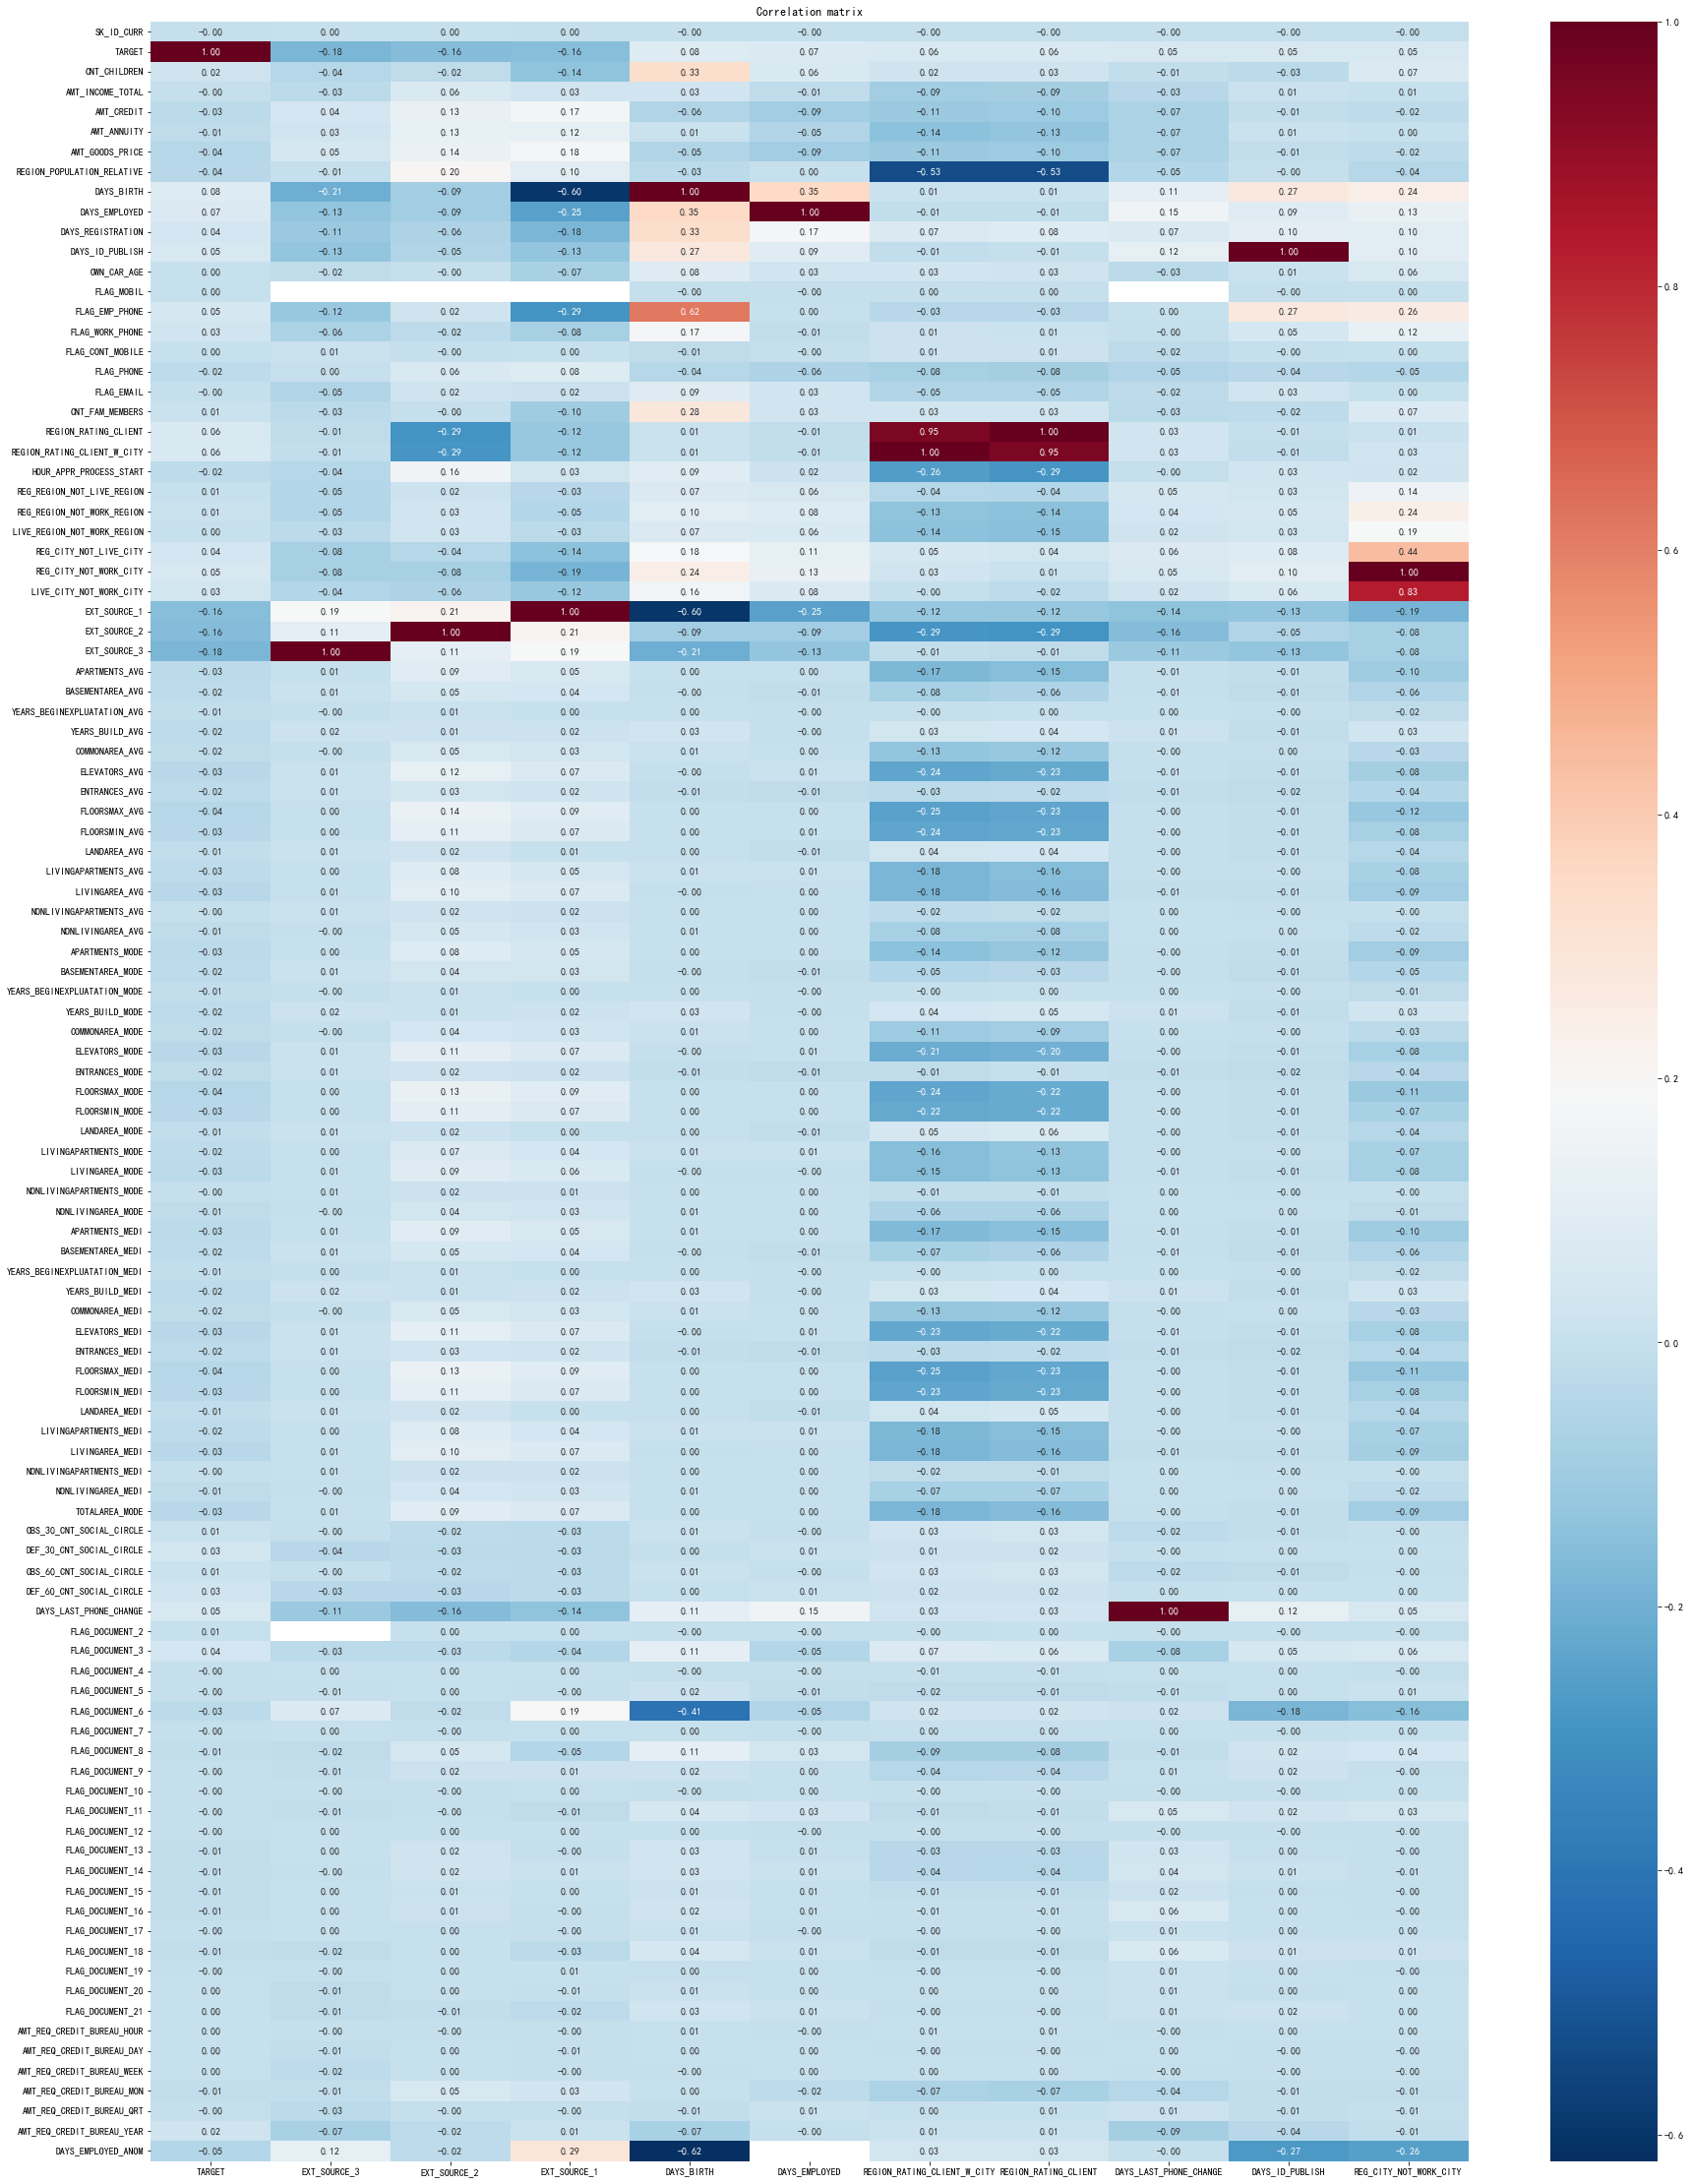

In [300]:
# 由于主表特征非常多，所以我们选取刚刚筛选出的与标签最相关的10个特征
correlations = application_train.corr()

plt.figure(figsize=(30,40))
sns.heatmap(correlations[correlations_abs.index.tolist()], cmap='RdBu_r', annot=True, fmt=".2f")
plt.title('Correlation matrix')
plt.show()

从上图中，我们可以看到，以±0.6为界限，DAYS_BIRTH、FLAG_EMP_PHONE、EXT_SOURCE_1和DAYS_EMPLOYED_ANOM之间存在强相关性。（此外，从字段名称上看，REGION_RATING_CLIENT_W_CITY和REGION_RATING_CLIENT之间也具有明显的关联性。）

In [301]:
# 为了方便查看，画出筛选出来的这几个特征之间的热力图
ext_data = application_train[['TARGET','DAYS_BIRTH','FLAG_EMP_PHONE','EXT_SOURCE_1','DAYS_EMPLOYED_ANOM']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,DAYS_BIRTH,FLAG_EMP_PHONE,EXT_SOURCE_1,DAYS_EMPLOYED_ANOM
TARGET,1.000000,0.078244,0.045985,-0.155316,-0.045990
DAYS_BIRTH,0.078244,1.000000,0.619889,-0.600625,-0.619948
FLAG_EMP_PHONE,0.045985,0.619889,1.000000,-0.294151,-0.999868
EXT_SOURCE_1,-0.155316,-0.600625,-0.294151,1.000000,0.294295
DAYS_EMPLOYED_ANOM,-0.045990,-0.619948,-0.999868,0.294295,1.000000


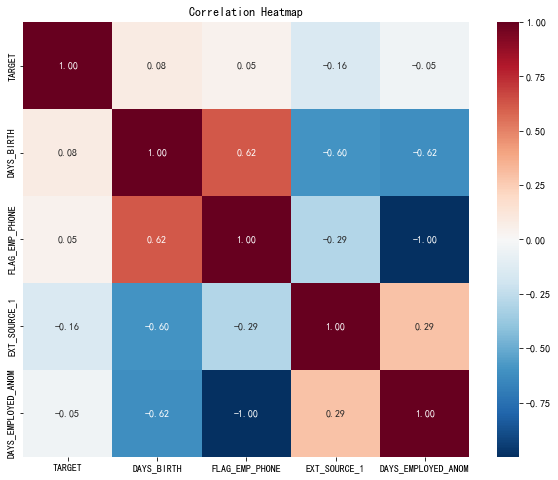

In [302]:
plt.figure(figsize = (10, 8))
sns.heatmap(ext_data_corrs, cmap='RdBu_r', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

> **结论**：
1. 受雇时间异常的人和出生日期有很大的关联性

2. 受雇时间异常的人全部也都没有提供工作号码

3. 外部文件1和出生日期有很强的关联性

下面我们逐一来详细看看：

1. 受雇时间异常的人和出生日期有很大的关联性

In [303]:
(application_train[application_train['DAYS_EMPLOYED_ANOM']==1]['DAYS_BIRTH']/-365).describe()

count    55374.000000
mean        59.753450
std          5.501600
min         21.071233
25%         57.093151
50%         60.413699
75%         63.487671
max         69.120548
Name: DAYS_BIRTH, dtype: float64

<AxesSubplot:>

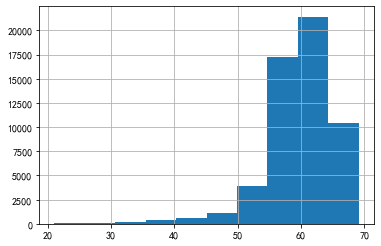

In [304]:
# 我们发现受雇日期异常的人年龄都分布在50-70岁，而且大多集中在55-65岁
(application_train[application_train['DAYS_EMPLOYED_ANOM']==1]['DAYS_BIRTH']/-365).hist()

我们可以看到受雇时间异常的人大多数年龄都在50-70之间

2. 受雇时间异常的人全部也都没有提供工作号码

In [305]:
# 因为DAYS_EMPLOYED_ANOM和FLAG_EMP_PHONE相关性为-1，所以我们尝试查看一下受雇日期异常的人工作电话是什么情况
application_train[application_train['DAYS_EMPLOYED_ANOM']==1]['FLAG_EMP_PHONE'].value_counts()

0    55374
Name: FLAG_EMP_PHONE, dtype: int64

这些人大多数本就没有工作号码

In [306]:
# FLAG_WORK_PHONE表示是否有家庭电话
application_train[application_train['DAYS_EMPLOYED_ANOM']==1]['FLAG_WORK_PHONE'].value_counts()

0    55373
1        1
Name: FLAG_WORK_PHONE, dtype: int64

受雇日期异常的群体似乎也是一个特殊群体？为了验证这一想法，我们继续探索：

In [307]:
# 大部分人都是养老金的领取者
application_train[application_train['DAYS_EMPLOYED_ANOM']==1]['NAME_INCOME_TYPE'].value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

大都没有工作

In [308]:
application_train[application_train['DAYS_EMPLOYED_ANOM']==1]['OCCUPATION_TYPE'].value_counts()

Unknow            55372
Cleaning staff        2
Name: OCCUPATION_TYPE, dtype: int64

这两个清洁工其实也都是领着养老金出来打工的，年龄都在57岁以上

In [313]:
application_train[(application_train['DAYS_EMPLOYED_ANOM']==1)&(application_train['OCCUPATION_TYPE']=='Cleaning staff')][['NAME_INCOME_TYPE','OCCUPATION_TYPE','DAYS_BIRTH']].assign(DAYS_BIRTH = lambda x: x['DAYS_BIRTH'] / -365)

,NAME_INCOME_TYPE,OCCUPATION_TYPE,DAYS_BIRTH
134327,Pensioner,Cleaning staff,58.147945
242307,Pensioner,Cleaning staff,57.369863


ORGANIZATION_TYPE为空的人全是工作日期异常的人

In [147]:
application_train[application_train['DAYS_EMPLOYED_ANOM']==1]['ORGANIZATION_TYPE'].value_counts()

XNA    55374
Name: ORGANIZATION_TYPE, dtype: int64

**总结**：根据以上的探索，我们可以推测，虽然我们之前通过核函数图发现受雇日异常的人违约率较低，并且把他们单独标注出来了，但是这个信息可能已经被其他特征所反映了，所以这个新创建的特征可能并不会有很强的效果。但是，工作日期异常的人显然是一种特殊的群体，如果我们能从业务的角度挖掘出这种群体的特点和原因，相信对建模将会有很大的帮助。

3. 外部文件1和出生日期有很强的关联性

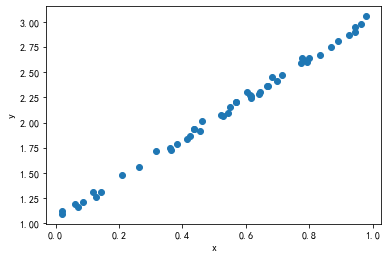

In [148]:
# 生成两个具有强相关性的变量
np.random.seed(0)
x = np.random.rand(50)
y = 2 * x + 1 + 0.1 * np.random.rand(50)

# 如果两个变量相关性非常强的话散点图应该是分布在某一条直（曲）线附近
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**散点图和六边形图分析**：我们通常用散点图来展示两个变量之间的相关性，如果两个变量有明显的线性相关，那么散点图应该呈现出如上图所示的趋势。但是，当我们用散点图来观察EXT_SOURCE_1和DAYS_BIRTH两个字段时，我们发现图形非常混乱，不容易看出它们之间的关系。因此，我们后面采用六边形图来观察这两个变量之间的关系。

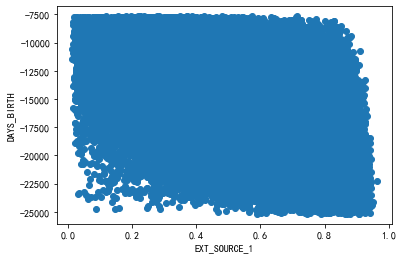

In [149]:
# 我们发现散点图并不能很好的反应EXT_SOURCE_1和DAYS_BIRTH之间的关系
plt.scatter(application_train['EXT_SOURCE_1'], application_train['DAYS_BIRTH'])
plt.xlabel('EXT_SOURCE_1')
plt.ylabel('DAYS_BIRTH')
plt.show()

六边形图中每个六边形的颜色表示该区域内数据的数量。通过下图，我们可以看到高亮的部分是集中在某一条直线周围的，因此EXT_SOURCE_1和DAYS_BIRTH两个字段确实存在某种相关性。

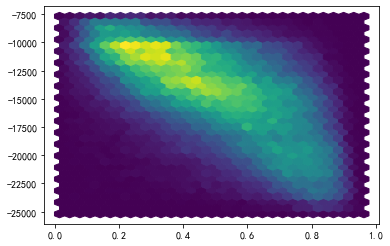

In [150]:
x = application_train['EXT_SOURCE_1']
y = application_train['DAYS_BIRTH']

# 绘制六角形图，高亮区域表示分布的非常密集
plt.hexbin(x, y, gridsize=30)
plt.show()

### 附录：主表全特征业务含义一览表

- SK_ID_CURR: 当前贷款申请的唯一编号，这只是一个标识符，没有实际的含义，本意是用来区分不同的客户，但是同一个客户同一个人，也可能会有不同的申请贷款变号。
- TARGET: 是否出现违约（1表示是，0表示否），这是我们要预测的目标变量
- NAME_CONTRACT_TYPE: 贷款合同的类型（现金贷款或循环贷款），反映了客户申请的贷款类型。不同的贷款类型可能有不同的利率、期限、还款方式等，这可能会影响客户的还款能力和意愿。
- CODE_GENDER: 性别（男性或女性），性别可能与客户的收入水平、消费习惯、风险偏好等有关，这可能会影响客户的还款行为。
- FLAG_OWN_CAR: 是否拥有汽车（Y表示是，N表示否），拥有汽车可能意味着客户有更高的生活水平和更多的交通便利，但也可能意味着客户有更多的支出和维护成本。
- FLAG_OWN_REALTY: 是否拥有房产（Y表示是，N表示否），拥有房产可能意味着客户有更高的资产价值和更稳定的居住环境，但也可能意味着客户有更高的负债和抵押成本。
- CNT_CHILDREN: 子女的数量，子女的数量可能与客户的家庭责任、教育支出、生活压力等有关。
- AMT_INCOME_TOTAL: 客户的收入总额，收入水平可能与客户的信用需求、还款能力、消费水平等有关。
- AMT_CREDIT: 贷款金额，贷款金额可能与客户的信用需求、还款压力、利息成本等有关。
- AMT_ANNUITY: 每期还款金额，每期还款金额可能与客户的收入水平、还款能力、现金流等有关。
- AMT_GOODS_PRICE: 贷款用途商品的价格，商品或服务的价格可能与客户的消费需求、消费偏好、消费效用等有关。
- NAME_TYPE_SUITE: 与客户一起申请贷款的人员类型（如家庭成员、朋友等），反映了客户是否有其他人陪同申请贷款。
- NAME_INCOME_TYPE: 收入类型（如工作、商业、养老金等），反映了客户收入来源和稳定性。收入类型可能与客户的收入水平、收入波动、收入风险等有关
- NAME_EDUCATION_TYPE: 教育程度（如高中、本科、硕士等），教育水平可能与客户的知识水平、职业水平、收入水平等有关
- NAME_FAMILY_STATUS: 婚姻状况（如已婚、未婚、离婚等），婚姻状况可能与客户的家庭责任、家庭支持、家庭压力等有关
- NAME_HOUSING_TYPE: 住房类型（如租房、与父母同住、公寓等），住房类型可能与客户的住房成本、住房质量、住房稳定性等有关，这可能会影响客户的还款能力和意愿。
- REGION_POPULATION_RELATIVE: 客户所在地区的相对人口密度，反映了客户所在地区的人口规模。人口密度可能与客户的生活水平、消费水平、竞争水平等有关。
- DAYS_BIRTH: 客户出生日期距离申请日期的天数（负数表示过去），年龄可能与客户的收入水平、消费水平、风险偏好等有关
- DAYS_EMPLOYED: 客户就业日期距离申请日期的天数（负数表示过去，正数表示未来），反映了客户的工作年限。工作年限可能与客户的职业水平、收入水平、工作稳定性等有关
- DAYS_REGISTRATION: 客户注册日期距离申请日期的天数（负数表示过去），反映了客户注册时间的长短。注册时间可能与客户的信用历史、信用记录、信用评分等有关
- DAYS_ID_PUBLISH: 客户身份证发布日期距离申请日期的天数（负数表示过去）
- OWN_CAR_AGE: 汽车的使用年限
- FLAG_MOBIL: 是否提供手机号码（1表示是，0表示否），提供手机号码可能与客户的联系方式、联系便利性、联系频率等有关，一定程度上体现了客户与贷款机构之间的沟通和信任。
- FLAG_EMP_PHONE: 是否提供工作电话号码（1表示是，0表示否）
- FLAG_WORK_PHONE: 是否有家庭电话号码（1表示是，0表示否）（官方提供的HomeCredit_columns_description.csv文件里是这么说的:Did client provide home phone (1=YES, 0=NO)）
- FLAG_CONT_MOBILE: 是否能联系到客户的手机号码（1表示是，0表示否）
- FLAG_PHONE: 是否提供家庭电话号码（1表示是，0表示否）
- FLAG_EMAIL: 是否提供电子邮箱地址（1表示是，0表示否）
- OCCUPATION_TYPE: 职业类型
- CNT_FAM_MEMBERS: 家庭成员数量
- REGION_RATING_CLIENT: 客户所在地区的评级（1,2,3）
- REGION_RATING_CLIENT_W_CITY: 客户所在城市的评级（1,2,3）
- WEEKDAY_APPR_PROCESS_START: 申请贷款时是星期几
- HOUR_APPR_PROCESS_START: 申请贷款的小时数
- REG_REGION_NOT_LIVE_REGION: 登记地区与居住地区是否不一致（1表示是，0表示否），反映了客户登记城市和居住城市是否相同。登记城市与居住城市不一致可能意味着客户有更频繁或更长期的迁移行为，这可能会影响客户的居住稳定性、社会关系等
- REG_REGION_NOT_WORK_REGION: 登记地区与工作地区是否不一致（1表示是，0表示否）
- LIVE_REGION_NOT_WORK_REGION: 居住地区与工作地区是否不一致（1表示是，0表示否）
- REG_CITY_NOT_LIVE_CITY: 登记城市与居住城市是否不一致（1表示是，0表示否）
- REG_CITY_NOT_WORK_CITY: 登记城市与工作城市是否不一致（1表示是，0表示否）
- LIVE_CITY_NOT_WORK_CITY: 居住城市与工作城市是否不一致（1表示是，0表示否）
- ORGANIZATION_TYPE: 这个字段包含了58个不同的类别，表示客户所在组织的类型，例如政府部门、宗教组织、商业公司等。这个字段可能会影响客户的信用风险，因为不同类型的组织可能会提供不同的工作稳定性和收入水平。
- EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 : 外部数据源提供的评分，外部数据源提供的评分可能与客户的信用历史、信用记录、信用评分、年龄等有关

- OBS_30_CNT_SOCIAL_CIRCLE : 客户社交圈内有观察到逾期30天以上的人数
- DEF_30_CNT_SOCIAL_CIRCLE : 客户社交圈内有违约30天以上的人数
- OBS_60_CNT_SOCIAL_CIRCLE : 客户社交圈内有观察到逾期60天以上的人数
- DEF_60_CNT_SOCIAL_CIRCLE : 客户社交圈内有违约60天以上的人数
- DAYS_LAST_PHONE_CHANGE : 客户最近一次更换手机号码距离申请日期的天数

- **其他：**
- xxxxxx_AVG,xxxxxx_MODE,xxxxxx_MEDI: 客户或客户家庭在房产登记处登记的信息，分别以平均值、众数和中位数统计（比如- FONDKAPREMONT_MODE是房屋维修资金众数，HOUSETYPE_MODE是房屋类型众数，TOTALAREA_MODE是房屋总面积众数，WALLSMATERIAL_MODE是墙壁材料众数，EMERGENCYSTATE_MODE是紧急状态众数）,
- FLAG_DOCUMENT_x(2-21): 客户是否提供了文件2 - 文件21 （1 表示是，0 表示否）
- AMT_REQ_CREDIT_BUREAU_xxxx: 客户在申请贷款前一个小时/一天/一周/一个月/一个季度/一年内向信用局发出的查询次数，一般来说，如果客户在申请贷款前向信用局发出的查询次数越多，可能意味着他们有更多的负债或者更高的信用需求，这可能会增加他们的还款压力和违约风险。

## 3 建立baseline

In [339]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,0.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,...,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186.0,-291,0.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,...,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225.0,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039.0,-9833.0,-2437,0.0,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [337]:
bureau = pd.read_csv('./bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [338]:
application_train.merge(bureau,on='SK_ID_CURR',how='left').head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,0.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.0,0.069,0.0833,0.125,...,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False,6158904.0,Closed,currency 1,-1125.0,0.0,-1038.0,-1038.0,NaN,0.0,40761.0,NaN,NaN,0.0,Credit card,-1038.0,0.0
1,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,0.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.0,0.069,0.0833,0.125,...,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False,6158905.0,Closed,currency 1,-476.0,0.0,NaN,-48.0,NaN,0.0,0.0,0.0,NaN,0.0,Credit card,-47.0,NaN
2,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,0.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.0,0.069,0.0833,0.125,...,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False,6158906.0,Closed,currency 1,-1437.0,0.0,-1072.0,-1185.0,0.000,0.0,135000.0,0.0,0.0,0.0,Consumer credit,-1185.0,0.0
3,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,0.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDA

In [340]:
application_train.merge(bureau,on='SK_ID_CURR',how='left').shape

(1509309, 139)

### 3.2 数据编码

In [204]:

apply = application_train.append(application_test)

In [205]:
# encoder
object_col = apply.dtypes[apply.dtypes == 'object'].index.to_list()
for col in object_col:
    if len(apply[col].unique()) > 2:
        apply = pd.concat([apply, pd.get_dummies(apply[col], prefix=col)], axis=1)
        apply.drop(columns=[col], inplace=True)
    else:
        apply[col] = pd.factorize(apply[col])[0]
apply.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,...,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1.0,0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0.018799,-9461,-637.0,-3648.0,-2120,0.0,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083008,0.262939,0.139404,0.024704,0.036896,0.972168,0.619141,0.014297,0.000000,0.068970,0.083313,0.125000,0.036896,0.020203,0.018997,0.000000,0.000000,0.025208,0.038300,0.972168,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
1,100003,0.0,0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,0.003542,-16765,-1188.0,-1186.0,-291,0.0,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311279,0.622070,NaN,0.095886,0.052887,0.984863,0.795898,0.060486,0.080017,0.034485,0.291748,0.333252,0.013000,0.077271,0.054901,0.003901,0.009804,0.092407,0.053802,0.984863,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,100004,0.0,1,0,1,0,0,67500.0,135000.0,6750.0,135000.0,0.010033,-19046,-225.0,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,NaN,0.556152,0.729492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0.0,0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,0.008018,-19005,-3040.0,-9832.0,-2437,0.0,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,NaN,0.650391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [206]:
# 取出测试集
apply[apply['TARGET'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,...,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,NaN,0,1,0,0,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329.0,-5170.0,-812,0.0,1,1,0,1,0,1,2.0,2,2,18,0,0,0,0,0,0,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,100005,NaN,0,0,0,0,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469.0,-9118.0,-1623,0.0,1,1,0,1,0,0,2.0,2,2,9,0,0,0,0,0,0,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100013,NaN,0,0,1,0,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458.0,-2175.0,-3503,5.0,1,1,0,1,0,0,2.0,2,2,14,0,0,0,0,0,0,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100028,NaN,0,1,0,0,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866.0,-2000.0,-4208,0.0,1,1,0,1,1,0,4.0,2,2,11,0,0,0,0,0,0,0.525734,0.509677,0.612704,0.3052,0.1974,0.9970,0.9592,0.1165,0.32,0.2759,0.3750,0.0417,0.2042,0.2404,0.3673,0.0386,0.0800,0.3109,0.2049,0.9970,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
4,100038,NaN,0,0,1,1,1,180000.0,625500.0,32067.0,62

In [207]:
# 分割训练集和测试集
application_test = apply[apply['TARGET'].isnull()]
application_test = application_test.drop('TARGET', axis = 1)
application_train = apply[~apply['TARGET'].isnull()]

- 逻辑回归

In [208]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# 删除'TARGET'和'SK_ID_CURR'列后的训练集赋值给train，以便于给模型训练
train = application_train.drop(columns=['TARGET', 'SK_ID_CURR'])

# 记录特征的名字
features = list(train.columns)

# 中位数插补缺失值
imputer = SimpleImputer(strategy='median')

# 将每个特征缩放到0-1的范围
scaler = MinMaxScaler(feature_range=(0, 1))

# 在训练数据上进行拟合
imputer.fit(train.append(application_test[features]))

# 对训练集和测试集进行转换
train = imputer.transform(train)
test = imputer.transform(application_test[features])

# 使用缩放器进行相同的操作
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

# 打印训练集和测试集的形状
print('训练数据形状: ', train.shape)
print('测试数据形状: ', test.shape)

训练数据形状:  (307505, 241)
测试数据形状:  (48744, 241)


In [209]:
from sklearn.linear_model import LogisticRegression

# 使用指定的正则化参数创建逻辑回归模型
log_reg = LogisticRegression(C=0.0001)

# 在训练数据上进行训练
log_reg.fit(train, application_train['TARGET'])

LogisticRegression(C=0.0001)

In [210]:
# 进行预测
# 确保只选择第二列（为1的概率）
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [211]:
# 获取特征的系数
coefficients = log_reg.coef_[0]

# 获取特征的重要性排序
feature_importance = np.abs(coefficients)  # 取系数的绝对值
sorted_indices = np.argsort(feature_importance)[::-1]  # 按重要性降序排序的索引

# 打印特征的重要性排序结果，我们发现外部文件和性别是最重要的特征
for idx in sorted_indices:
    print(f"Feature: {features[idx]}, Importance: {feature_importance[idx]}")

Feature: EXT_SOURCE_2, Importance: 0.2405776869670337
Feature: EXT_SOURCE_3, Importance: 0.22148494387060855
Feature: CODE_GENDER, Importance: 0.12388202811383153
Feature: NAME_EDUCATION_TYPE_Higher education, Importance: 0.10040804879417276
Feature: DAYS_BIRTH, Importance: 0.09090193401714977
Feature: EXT_SOURCE_1, Importance: 0.08899706072950254
Feature: NAME_EDUCATION_TYPE_Secondary / secondary special, Importance: 0.08784579927305529
Feature: NAME_INCOME_TYPE_Working, Importance: 0.08327166195331477
Feature: FLAG_DOCUMENT_3, Importance: 0.08141716333160717
Feature: REGION_RATING_CLIENT_W_CITY, Importance: 0.0786464602816574
Feature: REGION_RATING_CLIENT, Importance: 0.07709848136588489
Feature: FLAG_OWN_CAR, Importance: 0.07527943075160096
Feature: REG_CITY_NOT_WORK_CITY, Importance: 0.06099390870184973
Feature: DAYS_ID_PUBLISH, Importance: 0.06088400462088054
Feature: DAYS_LAST_PHONE_CHANGE, Importance: 0.06066262222788819
Feature: NAME_FAMILY_STATUS_Married, Importance: 0.0585306

In [212]:
# 保存预测结果
submit = application_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.064887
1,100005,0.112262
2,100013,0.066546
3,100028,0.072778
4,100038,0.111800


In [213]:
submit.to_csv('baseline_model_log_reg.csv', index = False) # 0.6859

- 随机森林

In [214]:
train = application_train.drop(columns=['TARGET', 'SK_ID_CURR'])

# 记录特征的名字
features = list(train.columns)

# 中位数插补缺失值
imputer = SimpleImputer(strategy='median')

# 在训练数据上进行拟合
imputer.fit(train.append(application_test[features]))

# 对训练集和测试集进行转换
train = imputer.transform(train)
test = imputer.transform(application_test[features])

# 打印训练集和测试集的形状
print('训练数据形状: ', train.shape)
print('测试数据形状: ', test.shape)

训练数据形状:  (307505, 241)
测试数据形状:  (48744, 241)


In [217]:
from sklearn.ensemble import RandomForestClassifier

# 实例化
random_forest = RandomForestClassifier(n_estimators = 1000, random_state = 2024, verbose = 1, n_jobs = -1)

train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [ ]:
# 在训练数据上进行训练
random_forest.fit(train, application_train['TARGET'])

# 提取特征重要性
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# 在测试数据上进行预测
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  6.6min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    3.0s
[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed:    4.0s finished


In [ ]:
feature_importances.sort_values(by='importance',ascending=False)

,feature,importance
32,EXT_SOURCE_2,0.050349
33,EXT_SOURCE_3,0.047596
...,...,...
92,FLAG_DOCUMENT_12,0.000000
15,FLAG_MOBIL,0.000000


In [ ]:
df = feature_importances.sort_values(by='importance',ascending=False)
df['importance'] = df['importance']*1000
df

,feature,importance
32,EXT_SOURCE_2,50.349103
33,EXT_SOURCE_3,47.596342
...,...,...
92,FLAG_DOCUMENT_12,0.000000
15,FLAG_MOBIL,0.000000


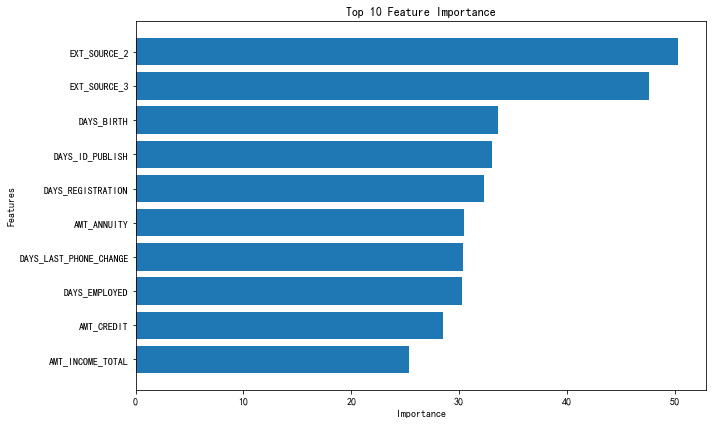

In [ ]:
# 选择前十个特征
top_10_features = df.nlargest(10, 'importance')

# 反转DataFrame或y轴标签的顺序
top_10_features = top_10_features[::-1]

# 创建一个水平条形图
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['feature'], top_10_features['importance'])

# 添加轴标签和标题
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importance')

# 设置y轴标签的位置和对齐方式
plt.yticks(range(len(top_10_features)), top_10_features['feature'])
plt.tight_layout()

# 显示图表
plt.show()

In [ ]:
def plot_feature_importances(df):
    # 选择前十个特征
    top_10_features = df.nlargest(10, 'importance')

    # 反转DataFrame或y轴标签的顺序
    top_10_features = top_10_features[::-1]

    # 创建一个水平条形图
    plt.figure(figsize=(10, 6))
    plt.barh(top_10_features['feature'], top_10_features['importance'])

    # 添加轴标签和标题
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Top 10 Feature Importance')

    # 设置y轴标签的位置和对齐方式
    plt.yticks(range(len(top_10_features)), top_10_features['feature'])
    plt.tight_layout()

    # 显示图表
    plt.show()

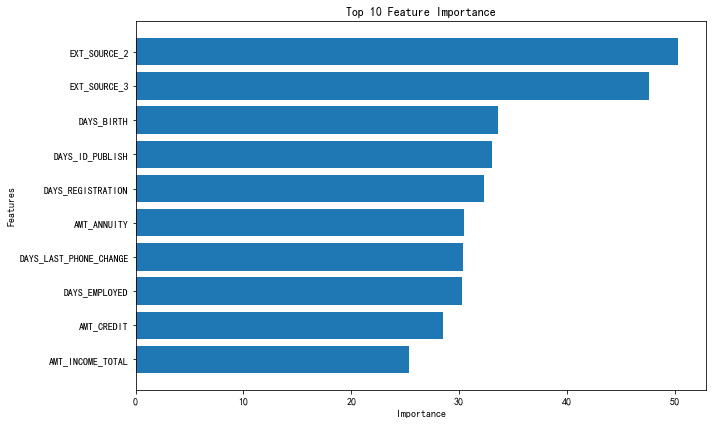

In [ ]:
# 检验上述函数的正确性
plot_feature_importances(df)

In [ ]:
submit = application_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# 保存预测结果
submit.to_csv('baseline_model_random_forest.csv', index = False) # 0.70961

- lightgbm

In [ ]:
def fit(train=application_train, valid=application_test):
    """
    模型训练函数

    参数:
    - train: 训练集，默认为application_train
    - valid: 测试集，默认为application_test

    返回值:
    - valid_auc: 验证集上的AUC指标
    - feature_importances: 特征重要性 dataframe
    - test_results: 测试集结果 dataframe
    """
    test = valid.copy()

    X_train = train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
    y_train = train['TARGET']

    # 五折交叉验证
    folds = KFold(n_splits=5, shuffle=True, random_state=1412)

    # 定义变量来保存预测结果
    oof_preds = np.zeros(y_train.shape[0])
    test_preds = np.zeros(test.shape[0])

    # 提取特征名
    feature_names = list(X_train.columns)

    # 空数组用于存储特征重要性值
    feature_importance_values = np.zeros(len(feature_names))

    # 实例化LGBMClassifier模型
    lgb = LGBMClassifier(
        n_estimators=10000,  # 为了保证模型的学习能力，我们设置为10000
        early_stopping_round=200,  # 为了节约时间，我们使用提前停止
        random_state=2024
        # device_type="gpu"
    )

    # 这里我们手动进行交叉验证，相对于cross_validate来说
    # 手动交叉验证的主要优点在于其灵活性，可以让我们更好地控制训练和验证的过程，
    # 可以在每一轮迭代后获取模型的性能数据，进行更详细的分析或调试。
    for fold_idx, (train_idx, valid_idx) in enumerate(folds.split(X_train)):
        X = X_train.iloc[train_idx, :]
        y = y_train.iloc[train_idx]
        valid_X = X_train.iloc[valid_idx, :]
        valid_y = y_train.iloc[valid_idx]

        # 拟合模型
        lgb.fit(X, y, eval_set=[(X, y), (valid_X, valid_y)])

        # 记录特征重要性
        feature_importance_values += lgb.feature_importances_ / folds.n_splits

        # 验证集上的预测结果
        oof_preds[valid_idx] = lgb.predict_proba(valid_X, num_iteration=lgb.best_iteration_)[:, 1]

        # 测试集上的预测结果
        test_preds += lgb.predict_proba(test[feature_names], num_iteration=lgb.best_iteration_)[:, 1] / folds.n_splits

    # 计算验证集上的AUC指标
    valid_auc = roc_auc_score(y_train, oof_preds)

    # 构建特征重要性的DataFrame
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

    # 将测试集的预测结果添加到DataFrame中
    test['TARGET'] = test_preds

    return valid_auc, feature_importances, test[['SK_ID_CURR', 'TARGET']]

In [ ]:
valid_auc,feature_importance,submission = fit(application_train,application_test)

LightGBMError: Do not support special JSON characters in feature name.

In [ ]:
bad_chars = [':', '"', '\\', ' ']

# 我们发现这些特殊字符是get_dummies时产生的
for feature in application_train.columns:
    if any(bad_char in feature for bad_char in bad_chars):
        print(f"Feature '{feature}' 包含非法字符。")

Feature 'NAME_TYPE_SUITE_Group of people' 包含非法字符。
Feature 'NAME_TYPE_SUITE_Spouse, partner' 包含非法字符。
Feature 'NAME_INCOME_TYPE_Commercial associate' 包含非法字符。
Feature 'NAME_INCOME_TYPE_Maternity leave' 包含非法字符。
Feature 'NAME_INCOME_TYPE_State servant' 包含非法字符。
Feature 'NAME_EDUCATION_TYPE_Academic degree' 包含非法字符。
Feature 'NAME_EDUCATION_TYPE_Higher education' 包含非法字符。
Feature 'NAME_EDUCATION_TYPE_Incomplete higher' 包含非法字符。
Feature 'NAME_EDUCATION_TYPE_Lower secondary' 包含非法字符。
Feature 'NAME_EDUCATION_TYPE_Secondary / secondary special' 包含非法字符。
Feature 'NAME_FAMILY_STATUS_Civil marriage' 包含非法字符。
Feature 'NAME_FAMILY_STATUS_Single / not married' 包含非法字符。
Feature 'NAME_HOUSING_TYPE_Co-op apartment' 包含非法字符。
Feature 'NAME_HOUSING_TYPE_House / apartment' 包含非法字符。
Feature 'NAME_HOUSING_TYPE_Municipal apartment' 包含非法字符。
Feature 'NAME_HOUSING_TYPE_Office apartment' 包含非法字符。
Feature 'NAME_HOUSING_TYPE_Rented apartment' 包含非法字符。
Feature 'NAME_HOUSING_TYPE_With parents' 包含非法字符。
Feature 'OCCUPATION_TYPE_Clean

In [ ]:
application_train.columns = [feature.replace(':', '').replace('"', '').replace('\\', '').replace(' ', '_').replace(',','_') for feature in application_train.columns]
application_test.columns = [feature.replace(':', '').replace('"', '').replace('\\', '').replace(' ', '_').replace(',','_') for feature in application_test.columns]

In [ ]:
bad_chars = [':', '"', '\\', ' ']

for feature in application_train.columns:
    if any(bad_char in feature for bad_char in bad_chars):
        print(f"Feature '{feature}' 包含非法字符。.")

In [ ]:
valid_auc,feature_importance,submission = fit(application_train,application_test)

[1]	training's binary_logloss: 0.275797	valid_1's binary_logloss: 0.271494
[2]	training's binary_logloss: 0.271714	valid_1's binary_logloss: 0.267829
[3]	training's binary_logloss: 0.268511	valid_1's binary_logloss: 0.264909
[4]	training's binary_logloss: 0.265898	valid_1's binary_logloss: 0.262527
[5]	training's binary_logloss: 0.263723	valid_1's binary_logloss: 0.260582
[6]	training's binary_logloss: 0.2619	valid_1's binary_logloss: 0.258961
[7]	training's binary_logloss: 0.260386	valid_1's binary_logloss: 0.257674
[8]	training's binary_logloss: 0.258976	valid_1's binary_logloss: 0.256438
[9]	training's binary_logloss: 0.257708	valid_1's binary_logloss: 0.255356
[10]	training's binary_logloss: 0.256642	valid_1's binary_logloss: 0.254438
[11]	training's binary_logloss: 0.255635	valid_1's binary_logloss: 0.253556
[12]	training's binary_logloss: 0.254799	valid_1's binary_logloss: 0.252861
[13]	training's binary_logloss: 0.254011	valid_1's binary_logloss: 0.252166
[14]	training's binary_

In [ ]:
# 本地验证成绩为0.757
valid_auc

0.7574072113112148

In [ ]:
feature_importance.sort_values(by='importance',ascending=False)

,feature,importance
31,EXT_SOURCE_1,272.8
33,EXT_SOURCE_3,261.8
...,...,...
90,FLAG_DOCUMENT_10,0.0
120,NAME_INCOME_TYPE_Pensioner,0.0


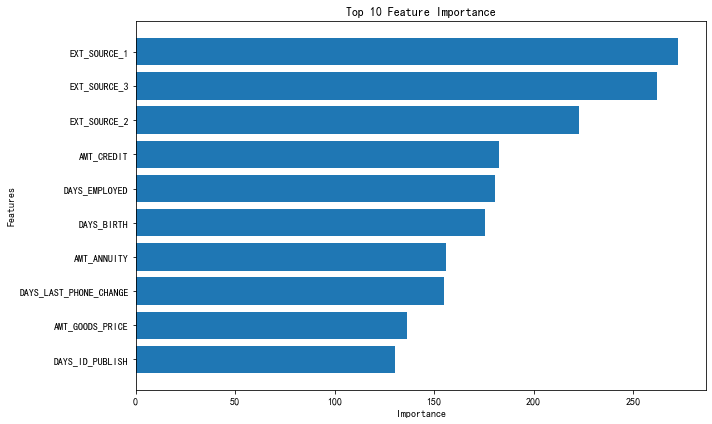

In [ ]:
plot_feature_importances(feature_importance.sort_values(by='importance',ascending=False))

In [ ]:
submission

,SK_ID_CURR,TARGET
0,100001,0.510184
1,100005,0.529975
...,...,...
48742,456224,0.514863
48743,456250,0.547353


<AxesSubplot:>

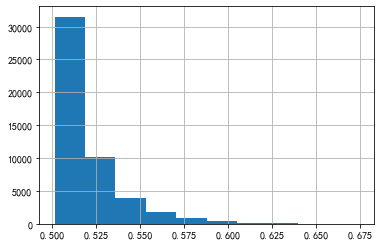

In [ ]:
submission['TARGET'].hist()

In [ ]:
# CPU成绩0.74373
submission.to_csv('baseline_model_lightgbm.csv',index=False)

In [ ]:
who

GridSearchCV	 KBinsDiscretizer	 KFold	 LGBMClassifier	 LabelEncoder	 LogisticRegression	 MinMaxScaler	 POS_CASH_balance	 RandomForestClassifier	 
SimpleImputer	 StandardScaler	 all	 application_test	 application_train	 apply	 bad_chars	 bureau	 bureau_balance	 
bureau_df	 class_counts	 coefficients	 col	 columns	 conda	 correlations	 correlations_abs	 credit_card_balance	 
cross_val_score	 csv_size	 csv_time	 derivative	 df	 df_csv	 df_parquet	 df_pd	 df_pl	 
df_test	 df_train	 end	 end_time	 ext_data	 ext_data_corrs	 fc	 feature	 feature_importance	 
feature_importance_values	 feature_importances	 features	 fit	 gc	 idx	 imputer	 indexer	 installments_payments	 
kde_plot	 le	 log_reg	 log_reg_pred	 make_scorer	 missing	 object_col	 os	 package	 
parquet_size	 parquet_time	 pip	 pl	 plot_feature_importances	 predictions	 previous_application	 random_forest	 re	 
reduce_mem_usage	 result	 roc_auc_score	 scaler	 sigmoid	 sklearn	 sns	 sorted_indices	 start	 
start_time	 sub	 sub1	 sub2	 

In [ ]:
# 导出预处理完的结果，以便于下个文件中调用
application_train.to_csv('original_application_train.csv')
application_test.to_csv('original_application_test.csv')